This is my capstone project under the 3MTT youth empowerment initiative in the digital economy

the first part to this exerise is to carry out Explorative Data Analysis(EDA) in a bid to understand key indices that are pertinent to the integrity and final report on the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
data=pd.read_csv('covid_19.csv')

In [6]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [8]:
data.shape

(49068, 10)

In [9]:
data.describe(include='all')

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
count,14664,49068,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04,49068
unique,78,187,NaN,NaN,188,NaN,NaN,NaN,NaN,6
top,Australian Capital Territory,China,NaN,NaN,2020-01-22,NaN,NaN,NaN,NaN,Europe
freq,188,6204,NaN,NaN,261,NaN,NaN,NaN,NaN,15040
mean,NaN,NaN,21.433730,23.528236,NaN,1.688490e+04,884.179160,7.915713e+03,8.085012e+03,NaN
std,NaN,NaN,24.950320,70.442740,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04,NaN
min,NaN,NaN,-51.796300,-135.000000,NaN,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01,NaN
25%,NaN,NaN,7.873054,-15.310100,NaN,4.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
50%,NaN,NaN,23.634500,21.745300,NaN,1.680000e+02,2.000000,2.900000e+01,2.600000e+01,NaN
75%,NaN,NaN,41.204380,80.771797,NaN,1.518250e+03,30.000000,6.660000e+02,6.060000e+02,NaN


In [10]:
data.duplicated().sum()

0

In [11]:
data.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

Data cleaning and transformation covers second part in the approach to the course of this exercise, which includes rename column, drop column however does not have direct relevance to the dataset, as well as time and location standardizations. Also, attributes like fillna will be utilized to fill empty rows as a result of data manipulation.

In [13]:
data.rename(columns={'Country/Region' : 'Country'}, inplace=True)

In [14]:
data.drop(columns=['Province/State'], inplace=True)

In [15]:
data['Date'] = pd.to_datetime(data['Date'])

In [16]:
data['Month'] = data['Date'].dt.month

In [17]:
data['Day'] = data['Date'].dt.day_name()

In [18]:
data.set_index('Date', inplace=True)

In [19]:
def format_coordinates(Lat, Long):
    if pd.isna(Lat) or pd.isna(Long):
        return None  # Return None if either value is missing
    return f"{Lat:.4f}, {Long:.4f}"  # Format to 4 decimal places
 
# Add a column with formatted coordinates
data["Coordinates"] = data.apply(lambda row: format_coordinates(row["Lat"], row["Long"]), axis=1)

Next, more columns(Mortality rate, Total population, Daily growth rate) added by creating derived values from existing columns to assist in indepth insights into the data.

In [21]:
data['Daily Growth Rate'] = (data['Confirmed'] - data['Confirmed'].shift(1)) / (data['Confirmed'].shift(1))*100

In [22]:
data = data.assign(Total_Population = data['Confirmed']+data['Recovered']+data['Active'])

In [23]:
data['Mortality rate'] = (data['Deaths'] / data['Total_Population'])*100

In [24]:
cases_per_population = data.groupby('Country')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().reset_index()

In [25]:
cases_per_population

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011
...,...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124,170967
183,Western Sahara,901,63,648,190
184,Yemen,67180,17707,23779,25694
185,Zambia,129421,2643,83611,43167


In [26]:
data.isnull().sum()

Country                  0
Lat                      0
Long                     0
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
WHO Region               0
Month                    0
Day                      0
Coordinates              0
Daily Growth Rate     8196
Total_Population         0
Mortality rate       10059
dtype: int64

In [27]:
data.fillna({'Daily Growth Rate' : 0}, inplace=True)

In [28]:
data.fillna({'Mortality rate' : 0}, inplace=True)

In [29]:
data[['Daily Growth Rate', 'Mortality rate']] = data[['Daily Growth Rate', 'Mortality rate']].round(2)

Next, this part includes graphs to visualize trends, pattern and extract insights from the data 

In [31]:
country_aggregate =data.groupby('WHO Region')['Confirmed'].sum()

In [102]:
country_aggregate

WHO Region
Africa                    21791827
Americas                 402261194
Eastern Mediterranean     74082892
Europe                   248879793
South-East Asia           55118365
Western Pacific           26374411
Name: Confirmed, dtype: int64

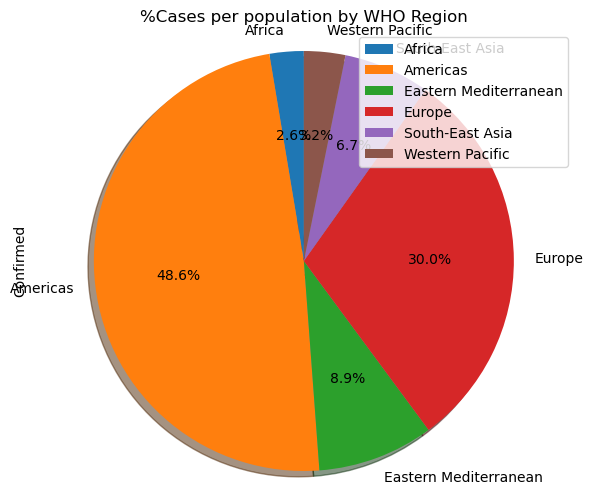

In [32]:
country_aggregate.plot(kind='pie', figsize = (7,6), autopct = '%1.1f%%', startangle = 90, shadow=True)

plt.axis('equal')
plt.title('%Cases per population by WHO Region')
plt.legend(labels=country_aggregate.index, loc='upper right')

In [104]:
mortality=data.groupby('Month')['Mortality rate'].mean()
mortality.sort_values(ascending=False)

Month
5    1.816246
4    1.691905
6    1.602628
7    1.501248
3    0.854592
2    0.149810
1    0.117299
Name: Mortality rate, dtype: float64

In [34]:
data.columns

Index(['Country', 'Lat', 'Long', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'WHO Region', 'Month', 'Day', 'Coordinates', 'Daily Growth Rate',
       'Total_Population', 'Mortality rate'],
      dtype='object')

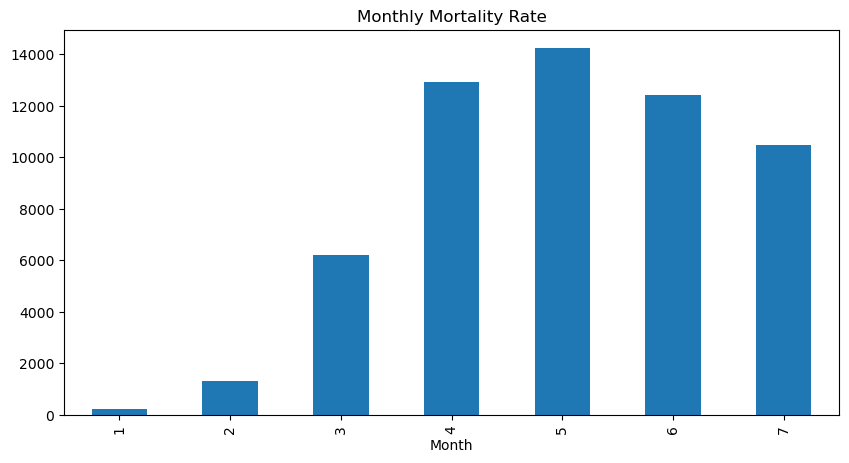

In [35]:
mortality.plot(kind='bar', figsize=(10,5), x='Mortality rate', y='Month')
plt.title('Monthly Mortality Rate')
plt.show()

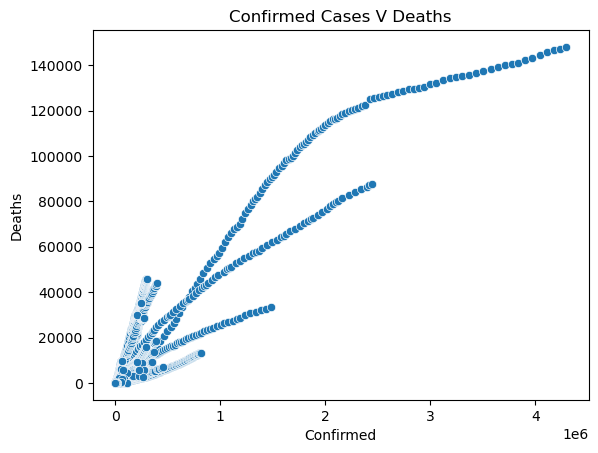

In [36]:
sns.scatterplot(x='Confirmed', y='Deaths', data=data)
plt.title('Confirmed Cases V Deaths')
plt.show()

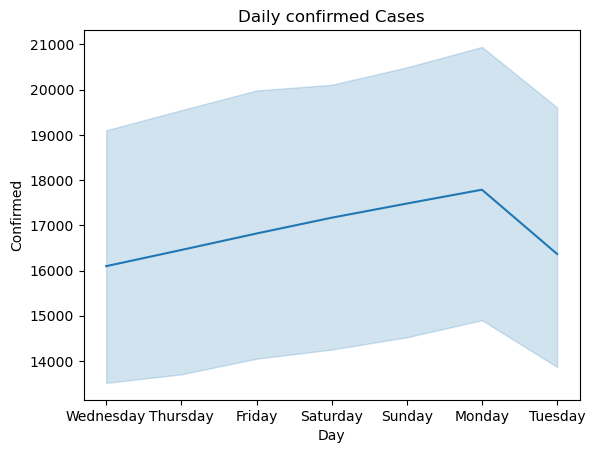

In [37]:
sns.lineplot(x='Day', y='Confirmed', data=data)
plt.title('Daily confirmed Cases')
plt.show()

Next, we explore the data for preprocessing and data modelling

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49068 entries, 2020-01-22 to 2020-07-27
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            49068 non-null  object 
 1   Lat                49068 non-null  float64
 2   Long               49068 non-null  float64
 3   Confirmed          49068 non-null  int64  
 4   Deaths             49068 non-null  int64  
 5   Recovered          49068 non-null  int64  
 6   Active             49068 non-null  int64  
 7   WHO Region         49068 non-null  object 
 8   Month              49068 non-null  int32  
 9   Day                49068 non-null  object 
 10  Coordinates        49068 non-null  object 
 11  Daily Growth Rate  49068 non-null  float64
 12  Total_Population   49068 non-null  int64  
 13  Mortality rate     49068 non-null  float64
dtypes: float64(4), int32(1), int64(5), object(4)
memory usage: 5.4+ MB


Lastly, this part entails data modelling and accuracy test 

In [41]:
import sklearn      
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [42]:
Encoder = LabelEncoder()

In [43]:
data['EncCountry'] = Encoder.fit_transform(data['Country'])
data['EncWHORegion'] = Encoder.fit_transform(data['WHO Region'])
data['EncDay'] = Encoder.fit_transform(data['Day'])

In [44]:
data.duplicated().sum()

7706

In [45]:
data.drop_duplicates(inplace=True)

In [46]:
data = data.replace([np.inf, -np.inf], np.nan).dropna()

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report

In [52]:
X = data[["Long","Lat","Deaths","Total_Population","EncCountry","EncDay","Month","EncWHORegion"]]
y = data[["Daily Growth Rate", "Mortality rate"]]

In [54]:
y = y.apply(lambda col: (col > col.median()).astype(int), axis=0)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
model = MultiOutputClassifier(base_model)
model.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

In [60]:
y_pred = model.predict(X_test)

In [62]:
for i, target in enumerate(y.columns):
    print(f"--- Target Variable: {target} ---")
    print("Accuracy:", accuracy_score(y_test.iloc[:, i], y_pred[:, i]))
    print("\nClassification Report:")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))

--- Target Variable: Daily Growth Rate ---
Accuracy: 0.9910590605717164

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4464
           1       0.99      0.99      0.99      3477

    accuracy                           0.99      7941
   macro avg       0.99      0.99      0.99      7941
weighted avg       0.99      0.99      0.99      7941

--- Target Variable: Mortality rate ---
Accuracy: 0.9954665659236872

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4048
           1       1.00      1.00      1.00      3893

    accuracy                           1.00      7941
   macro avg       1.00      1.00      1.00      7941
weighted avg       1.00      1.00      1.00      7941



In [68]:
predictions = model.predict(X_test)
print("Predictions:", predictions)

Predictions: [[0 0]
 [0 0]
 [1 1]
 ...
 [0 1]
 [0 0]
 [1 1]]


In [70]:
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9865256264954037


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test.iloc[:, 0], y_pred[:, 0]))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4464
           1       0.99      0.99      0.99      3477

    accuracy                           0.99      7941
   macro avg       0.99      0.99      0.99      7941
weighted avg       0.99      0.99      0.99      7941



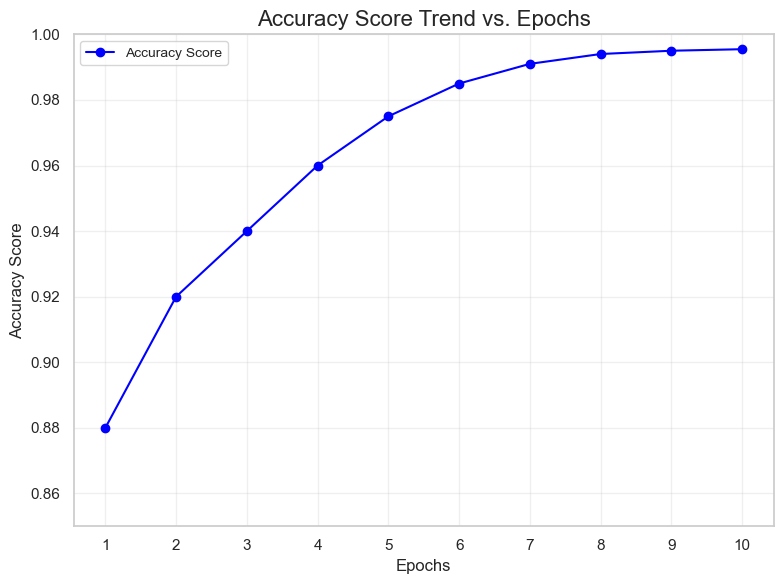

In [152]:
import matplotlib.pyplot as plt
import numpy as np

# Simulate data: Accuracy values improving over epochs
epochs = np.arange(1, 11)  # Epochs 1 to 10
accuracy = [0.88, 0.92, 0.94, 0.96, 0.975, 0.985, 0.991, 0.994, 0.995, 0.9954665659236872]  # Simulated accuracies

# Plot Accuracy vs. Epochs
plt.figure(figsize=(8, 6))
plt.plot(epochs, accuracy, marker='o', color='blue', label="Accuracy Score")

# Add annotations
plt.title("Accuracy Score Trend vs. Epochs", fontsize=16)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy Score", fontsize=12)
plt.grid(alpha=0.3)
plt.ylim(0.85, 1.0)  # Set y-axis range for better visualization
plt.xticks(epochs)
plt.legend(fontsize=10)
plt.tight_layout()